<font color='purple'>**PROJECT DESCRIPTION**</font>

You work as an analyst for the telecom operator Megaline. The company
offers its clients two prepaid plans, Surf and Ultimate. The commercial
department wants to know which of the plans is more profitable in order to
adjust the advertising budget.

# Table of contents
1. [Open the data file and study the general information](#step1)
2. [Prepare the data](#step2)
3. [Analyze the data](#step3)
4. [Test the hypotheses](#step4)
5. [Write an overall conclusion](#step5)

## Open the data file and study the general information <a name="step1"></a>

In [1]:
import pandas as pd
df_calls = pd.read_csv('https://code.s3.yandex.net/datasets/megaline_calls.csv')
df_calls.head()


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [2]:
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
id           137735 non-null object
user_id      137735 non-null int64
call_date    137735 non-null object
duration     137735 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [2]:
df_internet = pd.read_csv('https://code.s3.yandex.net/datasets/megaline_internet.csv')
df_internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


In [4]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
id              104825 non-null object
user_id         104825 non-null int64
session_date    104825 non-null object
mb_used         104825 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [3]:
df_messages = pd.read_csv('https://code.s3.yandex.net/datasets/megaline_messages.csv')
df_messages.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


In [6]:
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
id              76051 non-null object
user_id         76051 non-null int64
message_date    76051 non-null object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [7]:
df_plans = pd.read_csv('https://code.s3.yandex.net/datasets/megaline_plans.csv')
df_plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [8]:
df_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
usd_monthly_pay          2 non-null int64
usd_per_gb               2 non-null int64
usd_per_message          2 non-null float64
usd_per_minute           2 non-null float64
plan_name                2 non-null object
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [6]:
df_users = pd.read_csv('https://code.s3.yandex.net/datasets/megaline_users.csv')
df_users.sort_values(by = 'churn_date')

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
246,1246,Stevie,Moran,69,"Tampa-St. Petersburg-Clearwater, FL MSA",2018-01-09,ultimate,2018-07-31
363,1363,Sandee,Lott,33,"Seattle-Tacoma-Bellevue, WA MSA",2018-01-05,ultimate,2018-08-16
441,1441,Piedad,Myers,23,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-03-08,ultimate,2018-08-19
414,1414,Georgianne,Herring,30,"Urban Honolulu, HI MSA",2018-03-03,surf,2018-09-01
22,1022,Bo,Snow,73,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-04-20,surf,2018-09-07
...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaN
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaN
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaN
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaN


In [10]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
first_name    500 non-null object
last_name     500 non-null object
age           500 non-null int64
city          500 non-null object
reg_date      500 non-null object
plan          500 non-null object
churn_date    34 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


<font color='purple'>**Conclusion**</font>

We can see that we need to change dates columns which are object to datetime type. Also we know that Megaline is rounding seconds to minutes and to gb after 1024 megabytes, then we need to round that also. We can see that we dont have obvious missing values. In the column churn_date if users still use the plan, it occurs NaN

## Prepare the data <a name="step2"></a>

<font color='purple'>**Converting date columns and adding month columns**</font>



In [11]:
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format = '%Y-%m-%d')
df_calls['month'] = df_calls['call_date'].dt.month


df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 5 columns):
id           137735 non-null object
user_id      137735 non-null int64
call_date    137735 non-null datetime64[ns]
duration     137735 non-null float64
month        137735 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 5.3+ MB


<font color='purple'>**Also we ll check all the data for missing values and duplicates**</font>

In [12]:
df_calls.isnull().sum()

id           0
user_id      0
call_date    0
duration     0
month        0
dtype: int64

In [13]:
df_calls.duplicated().sum()

0

In [14]:
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format = '%Y-%m-%d')
df_internet['month'] = df_internet['session_date'].dt.month
df_internet['mb_used'] = df_internet['mb_used'].astype(int)
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 5 columns):
id              104825 non-null object
user_id         104825 non-null int64
session_date    104825 non-null datetime64[ns]
mb_used         104825 non-null int64
month           104825 non-null int64
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 4.0+ MB


In [15]:
df_internet.isnull().sum()

id              0
user_id         0
session_date    0
mb_used         0
month           0
dtype: int64

In [16]:
df_internet.duplicated().sum()

0

In [17]:
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format = '%Y-%m-%d')
df_messages['month'] = df_messages['message_date'].dt.month
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 4 columns):
id              76051 non-null object
user_id         76051 non-null int64
message_date    76051 non-null datetime64[ns]
month           76051 non-null int64
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 2.3+ MB


In [18]:
df_messages.isnull().sum()

id              0
user_id         0
message_date    0
month           0
dtype: int64

In [19]:
df_messages.duplicated().sum()

0

In [20]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
first_name    500 non-null object
last_name     500 non-null object
age           500 non-null int64
city          500 non-null object
reg_date      500 non-null object
plan          500 non-null object
churn_date    34 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


<font color='purple'>**We ll see who are those churned users**</font>

In [21]:
churned_users = df_users.query('churn_date != "NaN"')
churned_users.sort_values(by = 'churn_date')

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
246,1246,Stevie,Moran,69,"Tampa-St. Petersburg-Clearwater, FL MSA",2018-01-09,ultimate,2018-07-31
363,1363,Sandee,Lott,33,"Seattle-Tacoma-Bellevue, WA MSA",2018-01-05,ultimate,2018-08-16
441,1441,Piedad,Myers,23,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-03-08,ultimate,2018-08-19
414,1414,Georgianne,Herring,30,"Urban Honolulu, HI MSA",2018-03-03,surf,2018-09-01
22,1022,Bo,Snow,73,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-04-20,surf,2018-09-07
...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaN
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaN
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaN
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaN


In [22]:
churned_users['churn_date'] = pd.to_datetime(df_users['churn_date'], format = '%Y-%m-%d')
churned_users['churn_month'] = churned_users['churn_date'].dt.month
churned_users.sort_values(by = 'churn_month')

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,churn_month
246,1246,Stevie,Moran,69,"Tampa-St. Petersburg-Clearwater, FL MSA",2018-01-09,ultimate,2018-07-31,7.0
441,1441,Piedad,Myers,23,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-03-08,ultimate,2018-08-19,8.0
363,1363,Sandee,Lott,33,"Seattle-Tacoma-Bellevue, WA MSA",2018-01-05,ultimate,2018-08-16,8.0
491,1491,Terina,Jensen,22,"Grand Rapids-Kentwood, MI MSA",2018-04-27,surf,2018-09-18,9.0
466,1466,Alphonse,Harmon,56,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-01-26,surf,2018-09-17,9.0
...,...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaT,NaN
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaT,NaN
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaT,NaN
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaT,NaN


In [23]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
first_name    500 non-null object
last_name     500 non-null object
age           500 non-null int64
city          500 non-null object
reg_date      500 non-null object
plan          500 non-null object
churn_date    34 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [24]:
df_users.isnull().sum()

user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64

In [25]:
df_users.duplicated().sum()

0

In [26]:
df_calls.head()

,id,user_id,call_date,duration,month
0,1000_93,1000,2018-12-27,8.52,12
1,1000_145,1000,2018-12-27,13.66,12
2,1000_247,1000,2018-12-27,14.48,12
3,1000_309,1000,2018-12-28,5.76,12
4,1000_380,1000,2018-12-30,4.22,12


In [27]:
df_plans['gb_included'] = df_plans['mb_per_month_included']/1024
df_plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_included
0,50,15360,500,20,10,0.03,0.03,surf,15.0
1,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0


<font color='purple'>**Now we will make pivot tables to group dfs by user_id and month and make calculations so we can merge them easily together**</font>

In [28]:
calls = df_calls.pivot_table(index = ('user_id', 'month'), values = ('duration'), aggfunc =  'sum')
calls.head()

duration
user_id month          
1000    12       116.83
1001    8        171.14
        9        297.69
        10       374.11
        11       404.59

In [29]:
calls1 = df_calls.pivot_table(index = ('user_id', 'month'), values = ('duration'), aggfunc =  'count')
calls1.columns = ['calls_count']
calls1

calls_count
user_id month             
1000    12              16
1001    8               27
        9               49
        10              65
        11              64
...                    ...
1498    12              39
1499    9               41
        10              53
        11              45
        12              65

[2258 rows x 1 columns]

In [30]:
texts = df_messages.pivot_table(index = ('user_id', 'month'), values = 'id', aggfunc = 'count')
texts.head()

id
user_id month    
1000    12     11
1001    8      30
        9      44
        10     53
        11     36

In [31]:
texts.columns = ['messages']
texts.head()

messages
user_id month          
1000    12           11
1001    8            30
        9            44
        10           53
        11           36

In [32]:
internet = df_internet.pivot_table(index = ('user_id', 'month'), values = 'mb_used', aggfunc = 'sum')
internet.head()

mb_used
user_id month         
1000    12        1899
1001    8         6908
        9        13294
        10       22308
        11       18477

In [33]:
total1= pd.merge(left = internet , 
                right = calls, how='outer',on=['user_id', 'month']).fillna(0)
total2= pd.merge(left = total1 , 
                right = texts, how='outer',on=['user_id', 'month']).fillna(0)
total3 = pd.merge(left = total2 , 
                right = calls1, how='outer',on=['user_id', 'month']).fillna(0).reset_index()                 

<font color='purple'>**We are adding the column with Gbs monthly usage and rounding it**</font>

In [34]:
total3['gb_used'] = total3['mb_used']/1024
total3['gb_used'] = total3['gb_used'].round()

<font color='purple'>**After merging our pivot tables we have in one df - for each user: the number of calls made and minutes used per month, the number of text messages sent per month, the volume of data per month**</font>

In [35]:
print(len(total3))
total3.round()
total3

2293


,user_id,month,mb_used,duration,messages,calls_count,gb_used
0,1000,12,1899.0,116.83,11.0,16.0,2.0
1,1001,8,6908.0,171.14,30.0,27.0,7.0
2,1001,9,13294.0,297.69,44.0,49.0,13.0
3,1001,10,22308.0,374.11,53.0,65.0,22.0
4,1001,11,18477.0,404.59,36.0,64.0,18.0
...,...,...,...,...,...,...,...
2288,1470,11,0.0,602.30,156.0,81.0,0.0
2289,1470,12,0.0,560.44,153.0,78.0,0.0
2290,1484,11,0.0,37.50,1.0,2.0,0.0
2291,1491,4,0.0,40.45,6.0,8.0,0.0


<font color='purple'>**Now we can look up closer to churn dates,  and if the  difference between month of calls,messages, internet month and month of churning is negative - the churn rate is incorrect)**</font>

In [36]:
total3['churn'] = churned_users['churn_month'] - total3['month']
total3.query('churn < 0')

,user_id,month,mb_used,duration,messages,calls_count,gb_used,churn
246,1057,9,3815.0,152.97,21.0,21.0,4.0,-2.0
358,1076,11,21297.0,362.29,139.0,57.0,21.0,-1.0
414,1086,12,24750.0,317.22,74.0,46.0,24.0,-3.0
416,1087,12,12407.0,390.35,47.0,57.0,12.0,-1.0
491,1103,12,18330.0,375.07,36.0,53.0,18.0,-3.0


<font color='purple'>**Now to count monthly profit from each user we need to merge our df with df_users and df_plans so we ll have in one table all the plans details**</font>

In [37]:
total4 = pd.merge(left = total3 , 
                right = df_users, how='outer',on=['user_id']).fillna(0)
total4.head()

,user_id,month,mb_used,duration,messages,calls_count,gb_used,churn,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,12.0,1899.0,116.83,11.0,16.0,2.0,0.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,0
1,1001,8.0,6908.0,171.14,30.0,27.0,7.0,0.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0
2,1001,9.0,13294.0,297.69,44.0,49.0,13.0,0.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0
3,1001,10.0,22308.0,374.11,53.0,65.0,22.0,0.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0
4,1001,11.0,18477.0,404.59,36.0,64.0,18.0,0.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0


<font color='purple'>**To merge df_plans with our df we need exactly the same merging column names**</font>

In [38]:
total4 = total4.rename(columns = {'plan':'plan_name'})
total4.head()


,user_id,month,mb_used,duration,messages,calls_count,gb_used,churn,first_name,last_name,age,city,reg_date,plan_name,churn_date
0,1000,12.0,1899.0,116.83,11.0,16.0,2.0,0.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,0
1,1001,8.0,6908.0,171.14,30.0,27.0,7.0,0.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0
2,1001,9.0,13294.0,297.69,44.0,49.0,13.0,0.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0
3,1001,10.0,22308.0,374.11,53.0,65.0,22.0,0.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0
4,1001,11.0,18477.0,404.59,36.0,64.0,18.0,0.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0


In [39]:
df = pd.merge(left = total4 , 
                right = df_plans, how='outer',on=['plan_name']).fillna(0)
df.sort_values(by = 'month').head()

,user_id,month,mb_used,duration,messages,calls_count,gb_used,churn,first_name,last_name,...,plan_name,churn_date,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_included
2302,1473,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Kirk,Velez,...,surf,0,50,15360,500,20,10,0.03,0.03,15.0
2300,1319,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Eliseo,Carson,...,surf,0,50,15360,500,20,10,0.03,0.03,15.0
2299,1307,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Kristopher,Lang,...,surf,0,50,15360,500,20,10,0.03,0.03,15.0
2298,1143,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Lorina,Stevens,...,surf,0,50,15360,500,20,10,0.03,0.03,15.0
2297,1129,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Marin,Bolton,...,surf,2018-12-27,50,15360,500,20,10,0.03,0.03,15.0


In [40]:
df.query('month == 0')

,user_id,month,mb_used,duration,messages,calls_count,gb_used,churn,first_name,last_name,...,plan_name,churn_date,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_included
720,1025,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Jess,Wilkinson,...,ultimate,0,1000,30720,3000,70,7,0.01,0.01,30.0
721,1269,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Irving,Thompson,...,ultimate,2018-12-15,1000,30720,3000,70,7,0.01,0.01,30.0
722,1275,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Elvie,Velazquez,...,ultimate,0,1000,30720,3000,70,7,0.01,0.01,30.0
723,1463,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Dinorah,Simmons,...,ultimate,0,1000,30720,3000,70,7,0.01,0.01,30.0
2297,1129,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Marin,Bolton,...,surf,2018-12-27,50,15360,500,20,10,0.03,0.03,15.0
2298,1143,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Lorina,Stevens,...,surf,0,50,15360,500,20,10,0.03,0.03,15.0
2299,1307,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Kristopher,Lang,...,surf,0,50,15360,500,20,10,0.03,0.03,15.0
2300,1319,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Eliseo,Carson,...,surf,0,50,15360,500,20,10,0.03,0.03,15.0
2301,1378,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Mckinley,Clayton,...,surf,0,50,15360,500,20,10,0.03,0.03,15.0
2302,1473,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Kirk,Velez,...,surf,0,50,15360,500,20,10,0.03,0.03,15.0


<font color='purple'>**After merging we have 0 month which obviously we dont need**</font>

In [41]:
df = df[df.month != 0]
df.month.unique()

array([12., 11., 10.,  6.,  7.,  8.,  9.,  2.,  3.,  4.,  5.,  1.])

<font color='purple'>**In order to count monthly profit for each user we need to use function summing all additional payments if there are ones**</font>

In [42]:
def cost(row):
   
    duration = row['duration']
    messages = row['messages']
    gb = row['gb_used']
    min_incl = row['minutes_included']
    mes_incl = row['messages_included']
    gb_incl = row['gb_included']
    cost_plan = row['usd_monthly_pay']
    pay_min = row['usd_per_minute']
    pay_mes = row['usd_per_message']
    pay_gb = row['usd_per_gb']
    
    cost_calls = 0
    cost_messages = 0
    cost_internet = 0
    
    if duration > min_incl:
        cost_calls = (duration - min_incl)*pay_min
    else: 
        cost_calls = 0
        
    if messages > mes_incl:
        cost_messages = (messages - mes_incl)*pay_mes
    else:
        cost_messages = 0
        
    if gb > gb_incl:
        cost_internet = (gb - gb_incl)*pay_gb
    else:
        cost_internet = 0
   
    
    total_cost=cost_plan+cost_calls+cost_messages+cost_internet
    return total_cost
        

In [43]:
df['monthly_profit']=df.apply(cost,axis=1)
df.head()

,user_id,month,mb_used,duration,messages,calls_count,gb_used,churn,first_name,last_name,...,churn_date,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_included,monthly_profit
0,1000,12.0,1899.0,116.83,11.0,16.0,2.0,0.0,Anamaria,Bauer,...,0,1000,30720,3000,70,7,0.01,0.01,30.0,70.0
1,1006,11.0,2066.0,9.32,15.0,2.0,2.0,0.0,Jesusa,Bradford,...,2018-12-18,1000,30720,3000,70,7,0.01,0.01,30.0,70.0
2,1006,12.0,32085.0,54.79,139.0,9.0,31.0,0.0,Jesusa,Bradford,...,2018-12-18,1000,30720,3000,70,7,0.01,0.01,30.0,77.0
3,1008,10.0,17083.0,450.21,21.0,71.0,17.0,0.0,Emely,Hoffman,...,0,1000,30720,3000,70,7,0.01,0.01,30.0,70.0
4,1008,11.0,23652.0,422.81,37.0,63.0,23.0,0.0,Emely,Hoffman,...,0,1000,30720,3000,70,7,0.01,0.01,30.0,70.0


<font color='purple'>**Conclusion**</font>

We prepared data, converted to necessary types and found texts, calls and data volume and monthly profit for each user

## Analyze the data <a name="step3"></a>

<font color='purple'>**We ll find the mean of minutes, texts, and volume of data
the users require of each plan per month**</font>

In [44]:
plan_monthly = df.pivot_table(index = ('plan_name','month'), values = ('duration', 'messages', 'gb_used'))
plan_monthly = plan_monthly.round()
plan_monthly

duration  gb_used  messages
plan_name month                             
surf      1.0       193.0      5.0      10.0
          2.0       281.0     12.0      12.0
          3.0       311.0     13.0      15.0
          4.0       332.0     12.0      17.0
          5.0       377.0     14.0      24.0
          6.0       407.0     15.0      25.0
          7.0       425.0     16.0      27.0
          8.0       387.0     16.0      29.0
          9.0       391.0     16.0      31.0
          10.0      406.0     17.0      34.0
          11.0      400.0     16.0      32.0
          12.0      447.0     18.0      39.0
ultimate  1.0       183.0      7.0      16.0
          2.0       380.0     17.0      22.0
          3.0       286.0     18.0      20.0
          4.0       317.0     16.0      22.0
          5.0       384.0     16.0      32.0
          6.0       350.0     15.0      29.0
          7.0       404.0     16.0      33.0
          8.0       397.0     17.0      38.0
          9.0       413.0     17.0      38.0
          10.0      425.0     17.0      39.0
          11.0      420.0     17.0      39.0
          12.0      433.0     18.0      45.0

In [45]:
plan_monthly.query('plan_name == "surf"')['gb_used'].median()

15.5

In [46]:
plan_monthly.query('plan_name == "ultimate"')['gb_used'].median()

17.0

In [47]:
plan_monthly.query('plan_name == "surf"')['duration'].median()

389.0

In [48]:
plan_monthly.query('plan_name == "ultimate"')['duration'].median()

390.5

In [49]:
plan_monthly.query('plan_name == "surf"')['messages'].median()

26.0

In [50]:
plan_monthly.query('plan_name == "ultimate"')['messages'].median()

32.5

<font color='purple'>**Customer's behavior**</font>

We can see that, on average, all users have the same needs, not depending on plan. Users of both plans speaked the same amount of minutes, and number of texts and used data volume are close to each other. Also some seasonality is visible, people tend to communicate more from July to December and less from January to June. So we can make a conclusion that customer's behavior for both plans are pretty similar and a lot of customers are paying for ultimate but monthly using the same as surf customers.

<font color='purple'>**Now we ll find the variance and standart deviation**</font>

In [51]:
surf = df.query('plan_name == "surf"')
surf.describe()

,user_id,month,mb_used,duration,messages,calls_count,gb_used,churn,age,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_included,monthly_profit
count,1573.000000,1573.000000,1573.00000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.0,1573.0,1573.0,1573.0,1573.0,1.573000e+03,1.573000e+03,1573.0,1573.000000
mean,1242.755245,9.182454,16538.71583,404.762390,31.159568,59.811825,16.150032,0.034965,44.379530,50.0,15360.0,500.0,20.0,10.0,3.000000e-02,3.000000e-02,15.0,57.072419
std,139.227939,2.468199,8005.55424,221.664397,33.566717,32.017989,7.816787,0.431782,16.646535,0.0,0.0,0.0,0.0,0.0,1.041165e-17,1.041165e-17,0.0,53.664406
min,1001.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,-3.000000,18.000000,50.0,15360.0,500.0,20.0,10.0,3.000000e-02,3.000000e-02,15.0,20.000000
25%,1120.000000,8.000000,11971.00000,255.470000,3.000000,39.000000,12.000000,0.000000,29.000000,50.0,15360.0,500.0,20.0,10.0,3.000000e-02,3.000000e-02,15.0,20.000000
50%,1245.000000,10.000000,16806.00000,401.760000,24.000000,60.000000,16.000000,0.000000,45.000000,50.0,15360.0,500.0,20.0,10.0,3.000000e-02,3.000000e-02,15.0,39.899300
75%,1358.000000,11.000000,20975.00000,543.680000,47.000000,79.000000,20.000000,0.000000,59.000000,50.0,15360.0,500.0,20.0,10.0,3.000000e-02,3.000000e-02,15.0,80.000000
max,1499.000000,12.000000,70866.00000,1431.220000,266.000000,205.000000,69.000000,9.000000,75.000000,50.0,15360.0,500.0,20.0,10.0,3.000000e-02,3.000000e-02,15.0,578.637200


In [52]:
import numpy as np
surf_var = np.var(surf['monthly_profit'])
surf_var

2878.0376053466575

In [53]:
surf_std = np.std(surf['monthly_profit'])
surf_std

53.64734481171139

In [54]:
ultimate = df.query('plan_name == "ultimate"')
df.query('plan_name == "ultimate"').describe()

,user_id,month,mb_used,duration,messages,calls_count,gb_used,churn,age,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_included,monthly_profit
count,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.0,720.0,720.0,720.0,720.0,7.200000e+02,7.200000e+02,720.0,720.000000
mean,1253.330556,9.151389,17194.756944,406.193083,37.551389,60.626389,16.787500,0.029167,47.719444,1000.0,30720.0,3000.0,70.0,7.0,1.000000e-02,1.000000e-02,30.0,72.090278
std,150.915644,2.558495,7844.700025,227.246499,34.767179,33.242994,7.665149,0.492485,16.804088,0.0,0.0,0.0,0.0,0.0,1.735929e-18,1.735929e-18,0.0,10.696283
min,1000.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.000000,18.000000,1000.0,30720.0,3000.0,70.0,7.0,1.000000e-02,1.000000e-02,30.0,70.000000
25%,1126.000000,8.000000,12654.500000,246.290000,7.000000,36.000000,12.000000,0.000000,34.000000,1000.0,30720.0,3000.0,70.0,7.0,1.000000e-02,1.000000e-02,30.0,70.000000
50%,1241.500000,10.000000,16839.500000,398.585000,30.000000,61.000000,16.000000,0.000000,48.500000,1000.0,30720.0,3000.0,70.0,7.0,1.000000e-02,1.000000e-02,30.0,70.000000
75%,1401.000000,11.000000,20987.500000,532.227500,61.000000,80.000000,20.250000,0.000000,64.000000,1000.0,30720.0,3000.0,70.0,7.0,1.000000e-02,1.000000e-02,30.0,70.000000
max,1497.000000,12.000000,46551.000000,1292.090000,166.000000,191.000000,45.000000,10.000000,75.000000,1000.0,30720.0,3000.0,70.0,7.0,1.000000e-02,1.000000e-02,30.0,175.000000


In [55]:
ult_var = np.var(ultimate['monthly_profit'])
ult_var

114.25157214506171

In [56]:
ult_std = np.std(ultimate['monthly_profit'])
ult_std

10.688852704807084

In [57]:
ultimate= ultimate.rename(columns = {'duration':'calls_minutes', 'gb_used':'data_volume_gb'})
ultimate.head()

,user_id,month,mb_used,calls_minutes,messages,calls_count,data_volume_gb,churn,first_name,last_name,...,churn_date,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_included,monthly_profit
0,1000,12.0,1899.0,116.83,11.0,16.0,2.0,0.0,Anamaria,Bauer,...,0,1000,30720,3000,70,7,0.01,0.01,30.0,70.0
1,1006,11.0,2066.0,9.32,15.0,2.0,2.0,0.0,Jesusa,Bradford,...,2018-12-18,1000,30720,3000,70,7,0.01,0.01,30.0,70.0
2,1006,12.0,32085.0,54.79,139.0,9.0,31.0,0.0,Jesusa,Bradford,...,2018-12-18,1000,30720,3000,70,7,0.01,0.01,30.0,77.0
3,1008,10.0,17083.0,450.21,21.0,71.0,17.0,0.0,Emely,Hoffman,...,0,1000,30720,3000,70,7,0.01,0.01,30.0,70.0
4,1008,11.0,23652.0,422.81,37.0,63.0,23.0,0.0,Emely,Hoffman,...,0,1000,30720,3000,70,7,0.01,0.01,30.0,70.0


In [58]:
surf= surf.rename(columns = {'duration':'calls_minutes', 'gb_used':'data_volume_gb'})
surf.head()

,user_id,month,mb_used,calls_minutes,messages,calls_count,data_volume_gb,churn,first_name,last_name,...,churn_date,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_included,monthly_profit
724,1001,8.0,6908.0,171.14,30.0,27.0,7.0,0.0,Mickey,Wilkerson,...,0,50,15360,500,20,10,0.03,0.03,15.0,20.00
725,1001,9.0,13294.0,297.69,44.0,49.0,13.0,0.0,Mickey,Wilkerson,...,0,50,15360,500,20,10,0.03,0.03,15.0,20.00
726,1001,10.0,22308.0,374.11,53.0,65.0,22.0,0.0,Mickey,Wilkerson,...,0,50,15360,500,20,10,0.03,0.03,15.0,90.09
727,1001,11.0,18477.0,404.59,36.0,64.0,18.0,0.0,Mickey,Wilkerson,...,0,50,15360,500,20,10,0.03,0.03,15.0,50.00
728,1001,12.0,19345.0,392.93,44.0,56.0,19.0,0.0,Mickey,Wilkerson,...,0,50,15360,500,20,10,0.03,0.03,15.0,60.00


<font color='purple'>**Plotting histograms for calls, messages and data_volume for surf and ultimate plans**</font>

In [59]:
import warnings
warnings.filterwarnings('ignore')

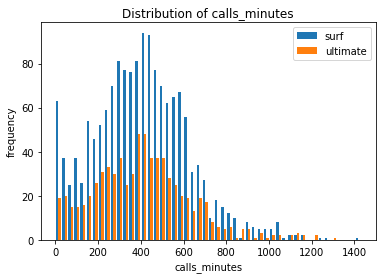

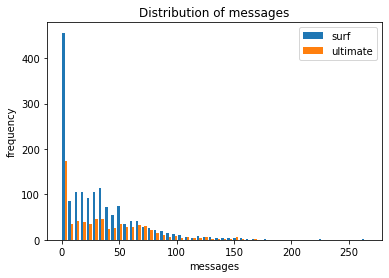

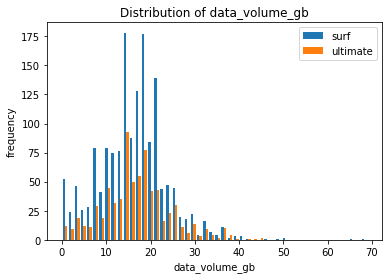

In [100]:
import matplotlib.pyplot as plt
column_names = ['calls_minutes', 'messages','data_volume_gb']
for  name in column_names:
    plt.hist([surf[name], ultimate[name]], bins = 50, label=['surf', 'ultimate'])
    plt.xlabel(name)
    plt.ylabel('frequency')
    plt.title('Distribution of {}'.format(name))
    plt.legend(loc='upper right')
    plt.show()

<font color='purple'>**To understand distribution we better make a shapiro test and build QQ plots**</font>

In [61]:
from scipy.stats import shapiro

shapiro(surf['data_volume_gb'])


(0.9638127088546753, 2.2060061661600795e-19)

In [62]:
from scipy.stats import shapiro

shapiro(surf['messages'])

(0.8401960730552673, 4.308234507173797e-37)

In [63]:
from scipy.stats import shapiro

shapiro(surf['calls_minutes'])

(0.9802971482276917, 7.152912702250436e-14)

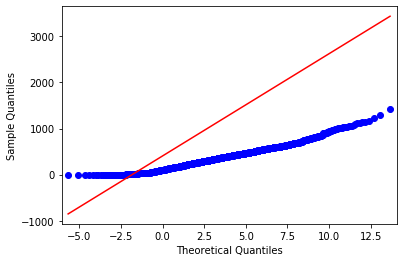

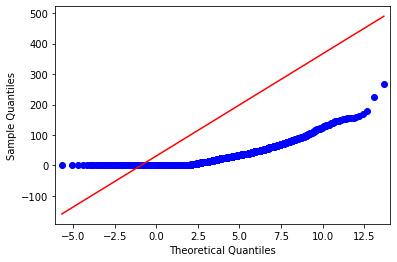

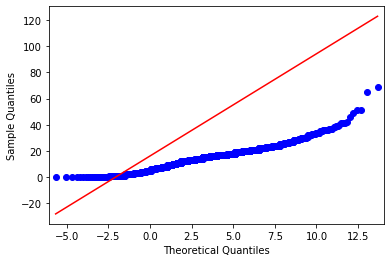

In [64]:
import statsmodels.api as sm
import pylab
sm.qqplot(surf['calls_minutes'], loc = 4, scale = 3, line='s')
sm.qqplot(surf['messages'], loc = 4, scale = 3, line='s')
sm.qqplot(surf['data_volume_gb'], loc = 4, scale = 3, line='s')

pylab.show()

<font color='purple'>**Also we ll do this check for profit slices**</font>

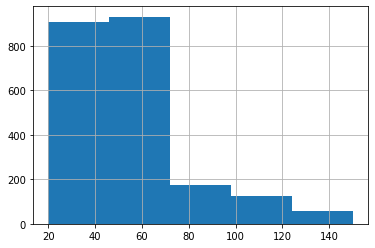

In [65]:
df['monthly_profit'].hist(bins = 5, range = (20,150));

In [66]:
from scipy.stats import shapiro


shapiro(df['monthly_profit'])

(0.7466968297958374, 0.0)

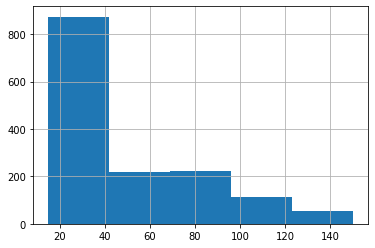

In [67]:
surf['monthly_profit'].hist(bins = 5, range = (15, 150));

In [68]:
from scipy.stats import shapiro
shapiro(surf['monthly_profit'])

(0.7074375152587891, 0.0)

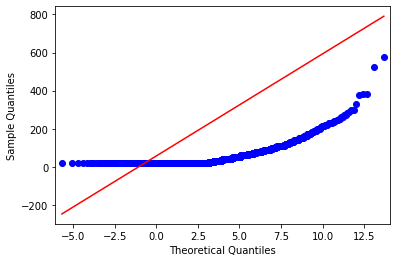

In [69]:
import statsmodels.api as sm
import pylab

sm.qqplot(surf['monthly_profit'], loc = 4, scale = 3, line='s')
pylab.show()

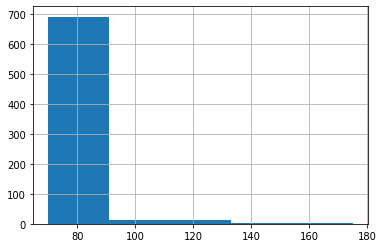

In [70]:
ultimate['monthly_profit'].hist(bins = 5);

In [71]:
from scipy.stats import shapiro

shapiro(ultimate['monthly_profit'])

(0.1986495852470398, 0.0)

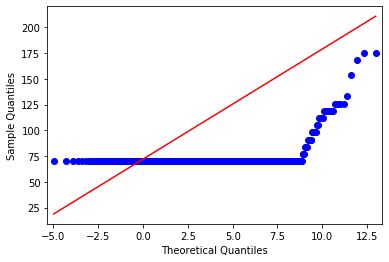

In [72]:
sm.qqplot(ultimate['monthly_profit'], loc = 4, scale = 3, line='s')
pylab.show()

<font color='purple'>**Conclusion**</font>

The customer's behavior for both plans on average are similar and users have the same needs. 

Shapiro tests and QQplots showed for all our column and plans slices NOT normal ditribution.

## Test the hypotheses <a name="step4"></a>

**The average profit from users of Ultimate and Surf calling plans differs**

So the null hyothesis is the **Ultimate and Surf calling plan are equal** and the alternative hypothesis is the **Ultimate and Surf calling plans differs**

We want to know if variances are equal or not, so we ll use Levene’s Test, it showed us that variances are not equal, so we ll put False in equal_var parameter and we ll use the standart alpha value 0.05 I tried bith ttest and Mann-whitney test in order that distribution of our slices are NOT normal. But in both tests null hypotheses were rejected.

In [73]:
from scipy import stats as st
import numpy as np

st.levene(surf['monthly_profit'], ultimate['monthly_profit'], center = 'median')

LeveneResult(statistic=385.21727998271245, pvalue=2.1119246161504124e-79)

In [74]:
surf1 = surf['monthly_profit']
ultimate1 = ultimate['monthly_profit']

alpha = .05

results = st.ttest_ind(
    surf1,
    ultimate1,
    equal_var = False)
print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value: 1.008487010038386e-25
We reject the null hypothesis


In [75]:
import scipy.stats as stats

results = stats.mannwhitneyu(surf1, ultimate1, alternative='two-sided')
print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value: 5.119918607609551e-66
We reject the null hypothesis


**The average profit from users in NY-NJ area is different from that of the
users from other regions**

In [76]:
NY_NJ = df[df.city.str.contains('NY-NJ')]
NY_NJ

,user_id,month,mb_used,duration,messages,calls_count,gb_used,churn,first_name,last_name,...,churn_date,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_included,monthly_profit
30,1031,7.0,10638.0,288.57,1.0,36.0,10.0,0.0,Lane,Martin,...,0,1000,30720,3000,70,7,0.01,0.01,30.0,70.0
31,1031,8.0,21588.0,454.72,2.0,62.0,21.0,0.0,Lane,Martin,...,0,1000,30720,3000,70,7,0.01,0.01,30.0,70.0
32,1031,9.0,12988.0,482.34,3.0,76.0,13.0,0.0,Lane,Martin,...,0,1000,30720,3000,70,7,0.01,0.01,30.0,70.0
33,1031,10.0,18751.0,530.79,2.0,74.0,18.0,0.0,Lane,Martin,...,0,1000,30720,3000,70,7,0.01,0.01,30.0,70.0
34,1031,11.0,16180.0,575.18,1.0,85.0,16.0,0.0,Lane,Martin,...,0,1000,30720,3000,70,7,0.01,0.01,30.0,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2280,1498,8.0,20237.0,244.57,0.0,44.0,20.0,0.0,Scot,Williamson,...,0,50,15360,500,20,10,0.03,0.03,15.0,70.0
2281,1498,9.0,22803.0,344.62,0.0,45.0,22.0,0.0,Scot,Williamson,...,0,50,15360,500,20,10,0.03,0.03,15.0,90.0
2282,1498,10.0,20552.0,278.06,0.0,46.0,20.0,0.0,Scot,Williamson,...,0,50,15360,500,20,10,0.03,0.03,15.0,70.0
2283,1498,11.0,19145.0,208.99,0.0,41.0,19.0,0.0,Scot,Williamson,...,0,50,15360,500,20,10,0.03,0.03,15.0,60.0


In [77]:
NY_NJ_area = df.query('city == "New York-Newark-Jersey City, NY-NJ-PA MSA"')
NY_NJ_area

,user_id,month,mb_used,duration,messages,calls_count,gb_used,churn,first_name,last_name,...,churn_date,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_included,monthly_profit
30,1031,7.0,10638.0,288.57,1.0,36.0,10.0,0.0,Lane,Martin,...,0,1000,30720,3000,70,7,0.01,0.01,30.0,70.0
31,1031,8.0,21588.0,454.72,2.0,62.0,21.0,0.0,Lane,Martin,...,0,1000,30720,3000,70,7,0.01,0.01,30.0,70.0
32,1031,9.0,12988.0,482.34,3.0,76.0,13.0,0.0,Lane,Martin,...,0,1000,30720,3000,70,7,0.01,0.01,30.0,70.0
33,1031,10.0,18751.0,530.79,2.0,74.0,18.0,0.0,Lane,Martin,...,0,1000,30720,3000,70,7,0.01,0.01,30.0,70.0
34,1031,11.0,16180.0,575.18,1.0,85.0,16.0,0.0,Lane,Martin,...,0,1000,30720,3000,70,7,0.01,0.01,30.0,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2280,1498,8.0,20237.0,244.57,0.0,44.0,20.0,0.0,Scot,Williamson,...,0,50,15360,500,20,10,0.03,0.03,15.0,70.0
2281,1498,9.0,22803.0,344.62,0.0,45.0,22.0,0.0,Scot,Williamson,...,0,50,15360,500,20,10,0.03,0.03,15.0,90.0
2282,1498,10.0,20552.0,278.06,0.0,46.0,20.0,0.0,Scot,Williamson,...,0,50,15360,500,20,10,0.03,0.03,15.0,70.0
2283,1498,11.0,19145.0,208.99,0.0,41.0,19.0,0.0,Scot,Williamson,...,0,50,15360,500,20,10,0.03,0.03,15.0,60.0


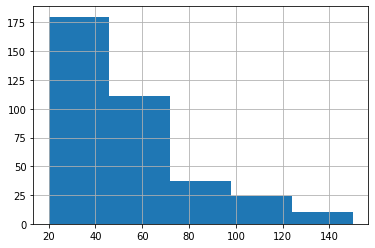

In [78]:
NY_NJ_area['monthly_profit'].hist(bins = 5, range = (20, 150));

In [79]:
from scipy.stats import shapiro

shapiro(NY_NJ_area['monthly_profit'])

(0.8146153092384338, 1.695104393918267e-20)

In [80]:
NY_NJ_var = np.var(NY_NJ['monthly_profit'])
NY_NJ_var

1765.848209607119

In [81]:
other_area = df.query('city != "New York-Newark-Jersey City, NY-NJ-PA MSA"')
other_area

,user_id,month,mb_used,duration,messages,calls_count,gb_used,churn,first_name,last_name,...,churn_date,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_included,monthly_profit
0,1000,12.0,1899.0,116.83,11.0,16.0,2.0,0.0,Anamaria,Bauer,...,0,1000,30720,3000,70,7,0.01,0.01,30.0,70.0000
1,1006,11.0,2066.0,9.32,15.0,2.0,2.0,0.0,Jesusa,Bradford,...,2018-12-18,1000,30720,3000,70,7,0.01,0.01,30.0,70.0000
2,1006,12.0,32085.0,54.79,139.0,9.0,31.0,0.0,Jesusa,Bradford,...,2018-12-18,1000,30720,3000,70,7,0.01,0.01,30.0,77.0000
3,1008,10.0,17083.0,450.21,21.0,71.0,17.0,0.0,Emely,Hoffman,...,0,1000,30720,3000,70,7,0.01,0.01,30.0,70.0000
4,1008,11.0,23652.0,422.81,37.0,63.0,23.0,0.0,Emely,Hoffman,...,0,1000,30720,3000,70,7,0.01,0.01,30.0,70.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2292,1470,8.0,0.0,547.38,141.0,84.0,0.0,0.0,Gerald,Reese,...,0,50,15360,500,20,10,0.03,0.03,15.0,24.1514
2293,1470,9.0,0.0,441.96,130.0,70.0,0.0,0.0,Gerald,Reese,...,0,50,15360,500,20,10,0.03,0.03,15.0,22.4000
2294,1470,10.0,0.0,434.68,145.0,72.0,0.0,0.0,Gerald,Reese,...,0,50,15360,500,20,10,0.03,0.03,15.0,22.8500
2295,1470,11.0,0.0,602.30,156.0,81.0,0.0,0.0,Gerald,Reese,...,0,50,15360,500,20,10,0.03,0.03,15.0,26.2490


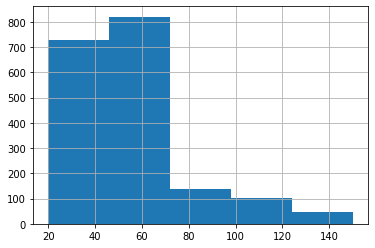

In [82]:
other_area['monthly_profit'].hist(bins = 5, range = (20, 150));

In [83]:
from scipy.stats import shapiro

shapiro(other_area['monthly_profit'])

(0.7312085628509521, 0.0)

In [84]:
other_var = np.var(other_area['monthly_profit'])
other_var

2111.131801769904

In [85]:
st.levene(NY_NJ_area['monthly_profit'], other_area['monthly_profit'], center = 'median')

LeveneResult(statistic=1.4052061451612359, pvalue=0.23597677244565446)

So the null hypothesis is  **the average profit from users in NY-NJ area equals to the profit of the users from other regions**  and the alternative hypothesis is **the average profit from users in NY-NJ area is different from that of the users from other regions**

We want to know if variances are equal or not, so we made Levene’s Test, it showed us that pvalue is greater then alpha, so variances are equal and we ll not put anything in equal_var parameter, because it comes as True, and we ll use the standart alpha value 0.05. I tried bith ttest and Mann-whitney test in order that distribution of our slices are NOT normal. But in both tests null hypotheses were rejected.

In [86]:
alpha = .05

results = st.ttest_ind(
    NY_NJ_area['monthly_profit'],
    other_area['monthly_profit'],
    )
print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value: 0.026335720594098663
We reject the null hypothesis


In [87]:
import scipy.stats as stats

results = stats.mannwhitneyu(NY_NJ_area['monthly_profit'], other_area['monthly_profit'], alternative='two-sided')

print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value: 0.0018182861307677008
We reject the null hypothesis


<font color='purple'>**Conclusion**</font>

The null hypotheses were rejected both times so it means:

1) the average profit from users of Ultimate and Surf calling plans differs

2) the average profit from users in NY-NJ area is different from that of the users from other regions

## Write an overall conclusion<a name="step5"></a>

**Customer's behavior** for both plan users is pretty similar and most of Ultimate customers are using monthly almost the same as surf customers.
 
**Profitability**
We have data on **500 users for 2018**. 339 of them use **Surf** plan and 161 **Ultimate** plan.
Hypotheses testing showed us that **Surf plan profit differes from Ultimate plan profit**.

The **total profit** for 2018 year for Surf plan is 89774.9 dollars and 51905 dollars for Ultimate plan.

The **median monthly profit** for Surf profit is 39 dollars, most users have overpay around 20 dollars and for Ultimate is 70 dollars,for most users the included package is enough. 

So we can see that on short distance **Ultimate plan is more profitable**, but on long one Surf can be more profitable, more customers prefer it because of lower price and spend more extras. 